In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the dataset

In [39]:
df = pd.read_csv("insurance.csv")

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [41]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [42]:
df.shape

(1338, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [45]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [46]:
# missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [47]:
df.shape

(1338, 7)

In [48]:
#check duplicate
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [49]:
df.shape

(1338, 7)

### Data Analysis

In [50]:
# x_axis = ['age','bmi','children','expenses']
# for x in x_axis:
#     fig, axes = plt.subplots(1,2,figsize=(18,4))
#     sns.distplot(df[x], ax=axes[0], kde = False)
#     sns.boxplot(df[x], ax=axes[1], orient="h", showmeans= True, color="pink")

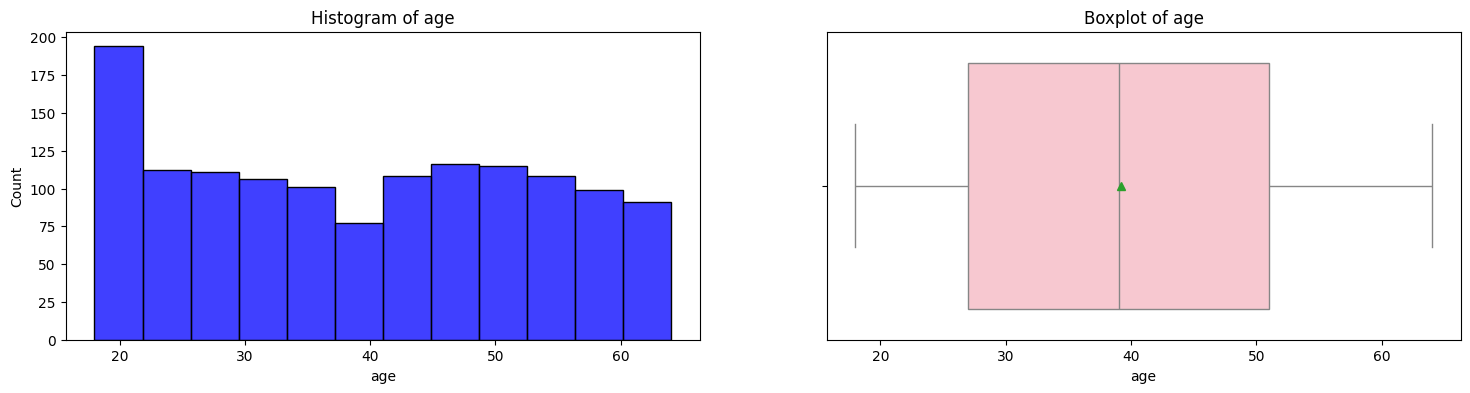

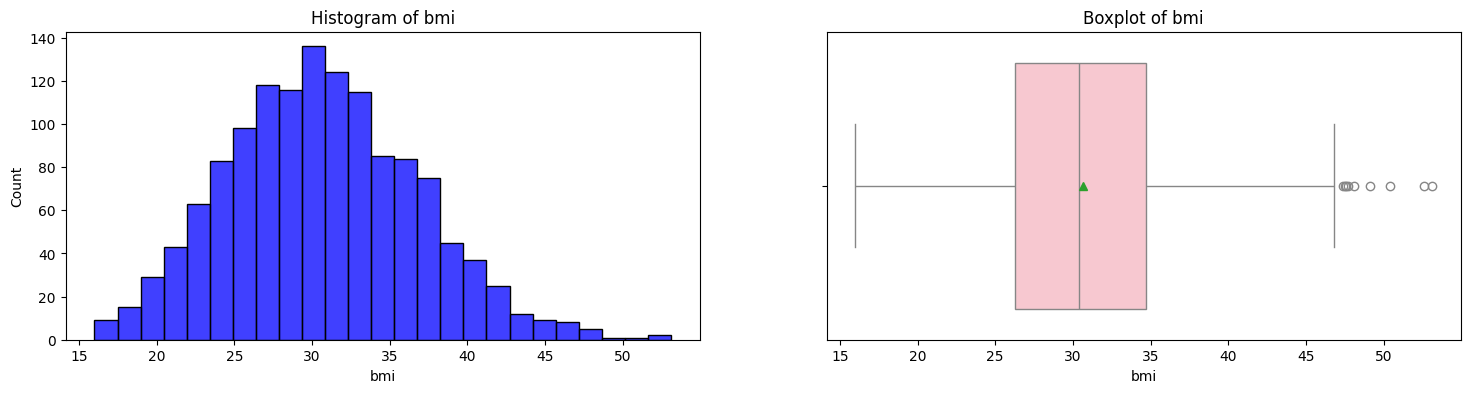

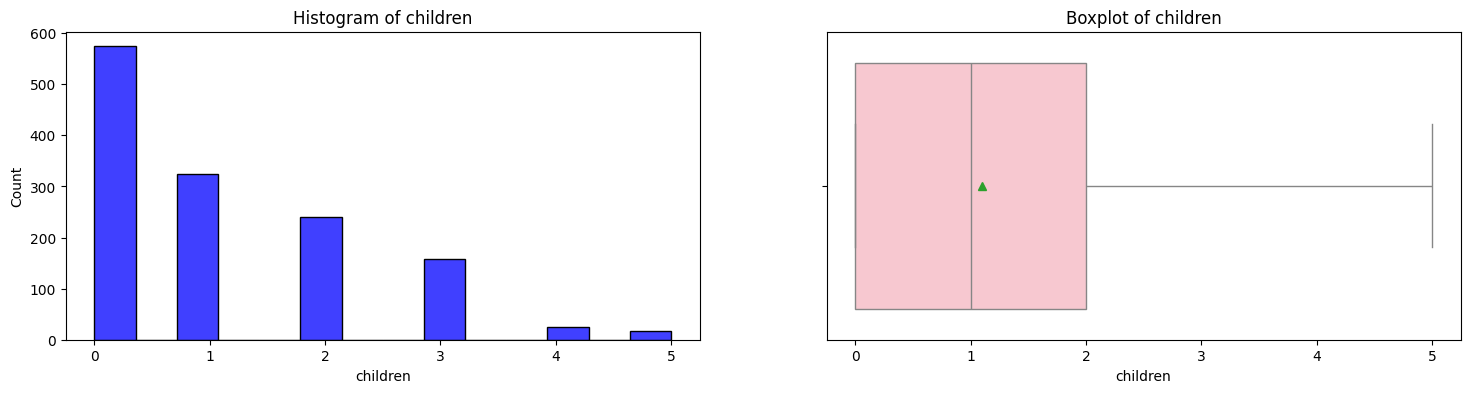

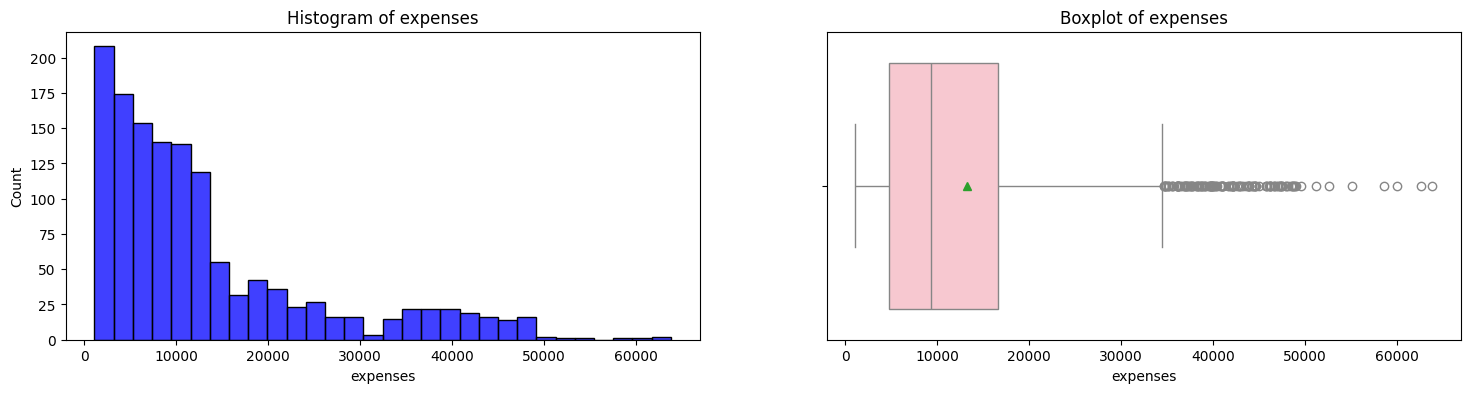

In [51]:
x_axis = ['age', 'bmi', 'children', 'expenses']  # Fix the typo in 'children'

for x in x_axis:
    if x in df.columns:  # Ensure the column exists in the DataFrame
        fig, axes = plt.subplots(1, 2, figsize=(18, 4))

        # Replace distplot with histplot
        sns.histplot(df[x], ax=axes[0], kde=False, color="blue")  # Histogram without KDE
        axes[0].set_title(f'Histogram of {x}')

        # Boxplot
        sns.boxplot(x=df[x], ax=axes[1], orient="h", showmeans=True, color="pink")
        axes[1].set_title(f'Boxplot of {x}')

        plt.show()
    else:
        print(f"Column '{x}' not found in DataFrame.")


### handle categorical columns

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [53]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [54]:
df['sex'] = df.sex.map({'female':0, 'male':1})

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [56]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [57]:
df['smoker'] = df.smoker.map({'yes':1, 'no':0})

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [59]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [60]:
df['region'] = df.region.map({'southwest':1 ,'southeast':2, 'northwest':3, 'northeast':4})

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### Split the dataset in x and y

In [63]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [64]:
x = df.drop(['expenses'], axis = 1)

In [65]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [66]:
y = df.expenses

In [67]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

### Train test split

In [68]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [72]:
x_train.shape

(1070, 6)

In [73]:
x_test.shape

(268, 6)

### Model Trainng

In [76]:
#linear regression
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(x_test)

In [82]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,y_pred)

In [83]:
score1

0.7833214205203847

In [84]:
# Support Vector regression
from sklearn.svm import SVR

In [85]:
svm = SVR()

In [86]:
svm.fit(x_train,y_train)

SVR()

In [88]:
y_pred = svm.predict(x_test)
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [89]:
score1

-0.07229746602305465

In [91]:
# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

In [92]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [94]:
score1

0.864390019049372

## Final model is random forest regressor

In [95]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [96]:
# predict charges in new customer

In [101]:
data = {
    'age': 19,
    'sex':0,
    'bmi':27.9,
    'children':0,
    'smoker':1,
    'region':1
}
new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [102]:
pred = rf.predict(new_df)
pred[0]

17099.13679999999

In [103]:
import joblib
joblib.dump(rf,'random_forest_regressor')

['random_forest_regressor']